# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [2]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [3]:
# Number of houses in the dataset
total_houses = len(housing_features)

# Number of features in the dataset
total_features = len(housing_features[0])

# Minimum housing value in the dataset
minimum_price = min(housing_prices)

# Maximum housing value in the dataset
maximum_price = max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **  
--------------------------------------------------------------------------------------------------------------------------------
1. **RM**    : More the number of rooms in the house, the more likely it is to be expensive.
2. **Age**   : The higher the  proportion of houses built prior to  1940 i.e more old houses, the more  likely is there to be demand for the new house and hence the higher house price, as people would want to upgrade 
3. **Lstat** : Measures the percentage of population in the lower economic status. With lower economic status population more,  here will be likely fewer people buying the house and hence likely isgnificant relation.
--------------------------------------------------------------------------------------------------------------------------------

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [4]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **
1. **RM** : 5.609
2. **AGE** : 90.0
3. **LSTAT** : 12.13

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [5]:
# Put any import statements you need for this code block here
import random
from sklearn.cross_validation import train_test_split


def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the ting and testing subsets. """
    shuffle_seed = 0.4
    split_ration = 7.0/10 # must.   0 else is treated as int
    
    # Shuffle and split the data
    #random.shuffle(X, lambda: shuffle_seed)
    #random.shuffle(y, lambda: shuffle_seed)
    #X_train = X[:int(len(X)*split_ration)]
    #y_train = y[:int(len(y)*split_ration)]
    #print(len(y), len(y)*7/10, len(y)*split_ration ,y_train,y[:400])
    #print(y_train)
    #X_test = X[int(len(X)*split_ration):]
    #y_test = y[int(len(y)*split_ration):]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 40)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** : 
1. To measure the accuracy of the model correctly, by testing across the  independent dataset
2. To overcome the problem of overfitting i.e if we use the same data set for the training the model and the training model, then its quite possible that we can create a model that perfectly fits the  current data set , however that does not fit the new data set , quite well .

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [6]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    #error = None
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** : We find the Mean Squared Error to be the most accurate performance metrics to predict the house price for the following reason.

1. Accuracy, Precision and recall and F1 score are rejected, as they are the metrics to evaluate the classification  model's efficiency . 
2. MAE and MSE are both metrics used to evaluate the regression model's accuracy. However MSE, penalises the model more, when the predicted value deviates greatly from the true value, hence we choose the model e.g A house that sales at 200K dollors, if is wrongly predicted by the model as 50K dollor, then its a huge loss for both buyer and seller, hence we want to penalise our model more for such inaccuracies vs  against the 180K predicted cost for 200K dollor house


## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [7]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    # {'splitter':('best','random')}
    
    #performance_metric(y_true, y_predict)
    # Make an appropriate scoring function  ## By default the parameter search uses the score function to evaluate parameter setting
    scoring_function = make_scorer( performance_metric, greater_is_better=False)

    # Make the GridSearchCV object ## Exhaustive Search over specified paramter values
    # parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
    reg = GridSearchCV(regressor, param_grid=parameters, scoring = scoring_function, verbose=100)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=1 .....................................................
[CV] .......................... max_depth=1, score=-34.513296 -   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[CV] max_depth=1 .....................................................
[CV] .......................... max_depth=1, score=-73.576766 -   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks       | elapsed:    0.0s
[CV] max_depth=1 .....................................................
[CV] .......................... max_depth=1, score=-96.325425 -   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks       | elapsed:    0.0s
[CV] max_depth=2 .....................................................
[CV] .......................... max_depth=2, score=-17.444716 -   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[CV] max_depth=2 .....................................................
[CV] .......................... max_depth=2, score=-

## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** :
1. *What ?* :Grid Search Algorithm is hyperparamter optimisation solution, that exhaustively iterates over all the manually specified parameters for a specified training algorithm i.e Decision tree, linear regression, SVM, neural e.tc and returns the results overview, allowing the machiene learning engineer to select the best parameter that would yield high accuracy .
2. *When ?* : We use it when we do not know, what the best parameter values are, to be used to train the machiene learning model. Hence we exhaustively iterate over all posible parameters and then find the best params for the model

**Problems of Grid Search**
1. **Correction: Exhaustive search across parameters  is avoidable **         
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ] says two grids should be explored: one with a linear kernel and C values in [1, 10, 100, 1000], and the second one with an RBF kernel
 
1. Too exhaustive i.e n parameters * n parmeter values combination search e.g parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} i.e all 4 combinations evaluated
2. Cartesian Products of parameters taken during evaluation, which often makes no sense, as the params are independent of each other  i.e kernel:rbf might have no relation to parameter:C, even then so, the rbf  kernel is evaluated with both values of C 
  
Other Parameter Optimisation approaches : 
2. Bayesian Optimisation : Trades off exploration (hyperparameters for whihc the outcome is most uncertain) and exploitation (hyperparams which are expected to have a good outcome). Often useful when the evaluation functions are very expensive, however grid and random optimisation have been found to perform better than bayesian, in practise is most of the experiments
3. Random Search : randomly sample parameters and run experiments
4. Gradient Based Optimisation :  gradient descent param tuning for linear regression, for SVM etc e.g grdiently climb down the hill unitl you reach the bottom of the valley  
REf:  https://en.wikipedia.org/wiki/Hyperparameter_optimization

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** : 
1. What? : Cross Validation is a model evaluation tehcnique, used to ensure that the model is not over-fitting. It gives out how the model will perform when a new set of data is provided e.g a model may be 100 percent accurate for a given data set, because it is overfitting. With no cross validation done for the given training dataset, the accuracy will be 100%, however if we do the cross validation, then the accuracy will drop down, because, we observe that the the model is overfitting and hence will perform poorly for the test datasets.
2. How? : A trainaing data is divided into k-set of folds. Then all data fold except one is used for training the model and the model is finally then applied in the held-out fold to test for accuracy. This process is iterated until all folds are checked against. The k results are then averaged for  calculating the finaly accuracy of the model.
3. Why? : To prevent overfitting. e.g Some parameters, might yield a model that is highly overfitting to the test set. To prevent such accidental overfitting, we  perform the cross-validation and ensure that such accidental parameters, leading to overfitting are prevented.

**CrossValidation** also used for Feature selection  e.g of the 20 variable avaialable for problem solving, cross validate with selected set of features adn compute which setof features are more relevant.




# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [8]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [9]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


c:\python27\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\python27\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
c:\python27\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


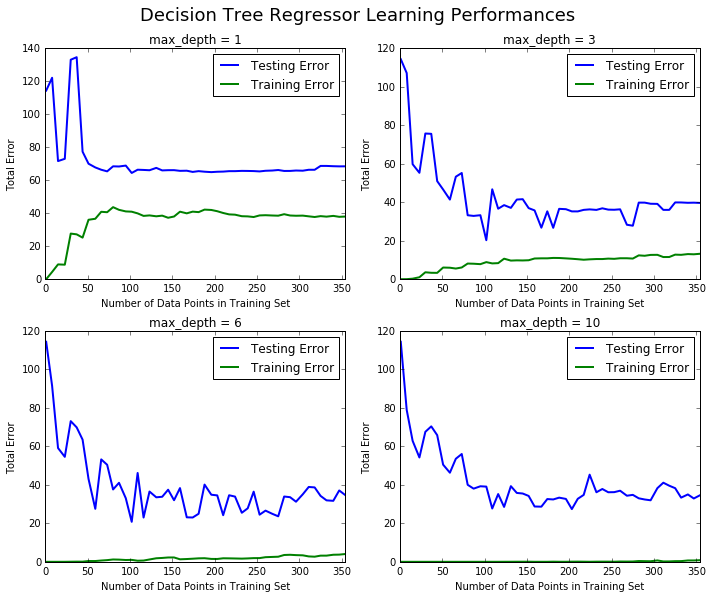

In [10]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **
1. Max Depth : 6
2. What happens to training error, as training set increases :  As training set increases,  the training error slowly and steadily increases. 
3. What happens to testing error, as training set increases :  As training set increases,  the training error exponentially reduces. However after certain number of  training data points i.e about 100 training datasets, further addition of training dataset appears to create a model, that is overfitting and hence the testing error seems to slightly increase and fluctuate  around 35.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **
1. Max depth 1 : The model suffers from high bias i.e underfitting. And hence, the model has high error rate for the training set and also high error rate for the test set.
2. Max depth 10 : The model  suffers from high variance i.e overfitting. And hence, the model has low error rate for training set, however when it is tested across independent set, we observe the high error rate.

Creating a model complexity graph. . . 


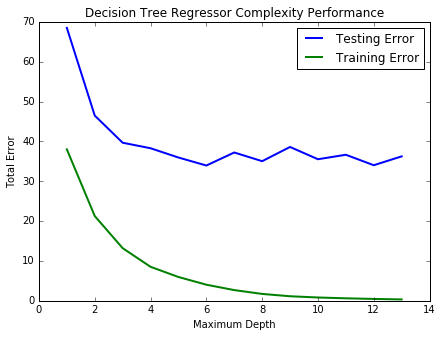

In [11]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **
1. Description : As the max depth increases, there is exponential decrease in both the testing and traing errors. However after certain maximum depth,  i.e 6 in particular case, while the training error seems to reduce further steadily down towards zero, the training error seems to increase and fluctuate around the 40 error range, indicating that the model starts to suffer more and more from high variance as max depth increases beyond the depth 6 i.e overfitting the training data set. 
2. Which  Max depth  generalises best for both ? Hence we would chose the max depth 6 as the best depth, as it is the best tradeoff, point where the accuracy of the model, as tested across the train set is the highest, while the train error rate is reasonable i.e not suffering from ovrfitting across the training set.


# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [12]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 8


**Answer: **
1. Optimal Max_depth parameter : 9.
2. Vs Intuition : The max depth parameter assumed by us 6 is different to the one predicted by the optimised model. Our visual observation and evalutaion method based on the graph analysis, seems to be prone to human observation / human analysis error and hence only was able to yield an approximate result, while the mathematically computed max_depth, was more accurate and different.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [13]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])
#print(CLIENT_FEATURES)
#print X_train[0,:], y_train[0]

Predicted value of client's home: 18.817


**Answer: **
1. Best Selling Price for our client's home : 19.327 or 19,327$
2. How does it compare to basic statistics : The selling price is  based around the median value of the house price.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** We will not use the Decision Tree Regression model to predict for the following reasons
1. MSE is a measure that  can only be compared between models whose error are measured in same units. That said, having no other model, it is unclear as if the model we have is the best or some other supervision model will perform beter.
2. Regression tree are unable to simulate the XOR conditions e.g no of room <10 and age of house<50. This might also bea shortcoming for the regression tree model we have used, which we cannot confirm.  
Ref:  https://en.wikipedia.org/wiki/Mean_squared_error

